## Estimación de Tiempos de Entrega:

Predice los tiempos de entrega mejor que el típico “quizás mañana.” Ten en cuenta factores como ubicación del envío, rendimiento del courier, categoría del producto, volumen de pedidos y tiempos históricos de entrega. Proporciona estimaciones precisas y destaca pedidos con riesgo de retraso para tomar medidas correctivas.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
delivery = pd.read_csv("clase2201/food.csv")

In [27]:
delivery.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [28]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [29]:
delivery_copy= delivery.copy()

In [30]:
delivery_copy.drop(columns="Order_ID", inplace=True)

In [31]:
delivery_copy.dropna(inplace=True)

In [32]:
delivery_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             883 non-null    float64
 1   Weather                 883 non-null    object 
 2   Traffic_Level           883 non-null    object 
 3   Time_of_Day             883 non-null    object 
 4   Vehicle_Type            883 non-null    object 
 5   Preparation_Time_min    883 non-null    int64  
 6   Courier_Experience_yrs  883 non-null    float64
 7   Delivery_Time_min       883 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.1+ KB


## Regresion Lineal

In [43]:
# Funcion Hipotesis y=mx+n (ecuacion de la recta)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

In [34]:
# 2. Preprocesamiento: Codificación de variables categóricas
categorical_features = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]

In [35]:
# One-Hot Encoding
df_encoded = pd.get_dummies(delivery_copy, columns=categorical_features, drop_first=True)

In [36]:
# Seleccionar características y variable objetivo
X = df_encoded.drop(columns=["Delivery_Time_min"])
y = df_encoded["Delivery_Time_min"]

In [37]:
# 3. División en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:

# Normalización de datos numéricos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
# 4. Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

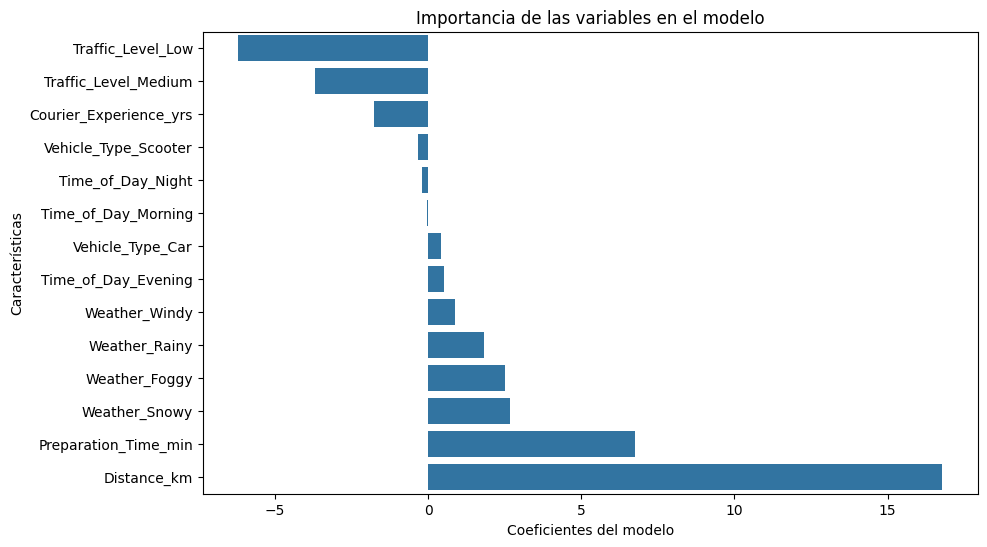

In [40]:
def plot_feature_importance(model, feature_names):
    coefficients = pd.Series(model.coef_, index=feature_names)
    coefficients = coefficients.sort_values()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coefficients, y=coefficients.index)
    plt.xlabel("Coeficientes del modelo")
    plt.ylabel("Características")
    plt.title("Importancia de las variables en el modelo")
    plt.show()

plot_feature_importance(model, X.columns)

In [41]:
# 6. Evaluación del modelo
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")

R²: 0.8323
MSE: 70.88


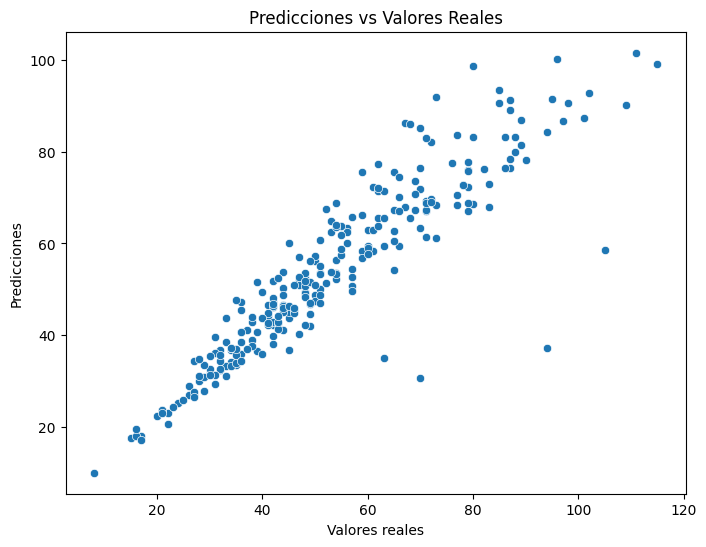

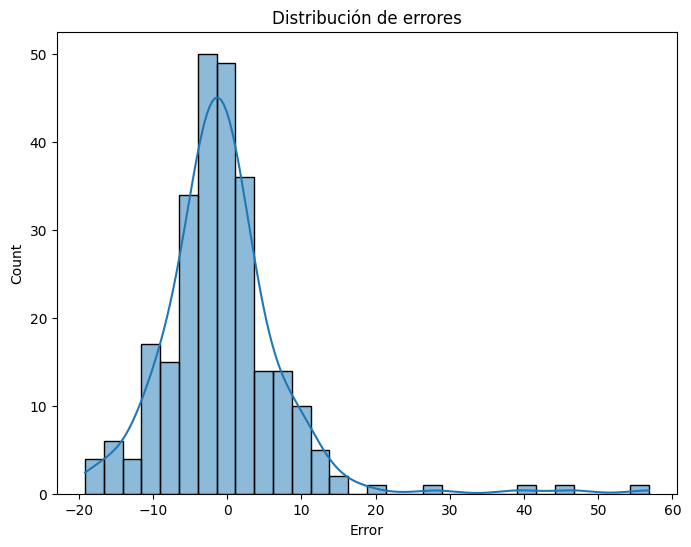

In [42]:
# 7. Visualización de resultados
# Dispersión de predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

# Distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel("Error")
plt.title("Distribución de errores")
plt.show()

## Conclusion:

El gráfico de dispersión muestra una correlación positiva entre los valores reales y las predicciones del modelo, lo que indica que el modelo de regresión lineal logra capturar correctamente la tendencia general de los datos. Sin embargo, se observan algunas desviaciones y dispersiones en valores más altos, lo que sugiere que la precisión del modelo podría mejorarse con técnicas adicionales, como la optimización de hiperparámetros o el uso de modelos más complejos. 

Cabe mencionar que el tamaño de la base de datos, es algo pequeña.